In [1]:
#ProstateX final 

#Andrii Trokoz



'''
Importing all the necessary libraries and frameworks in order to start image processing 
'''
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd

In [33]:
#reading .csv in order to get all of necessary coordinates for cropping 

data_all = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
#data_ktrans = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/')
data_all.head(10)

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8
5,ProstateX-0000,t2_tse_cor0,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
8,ProstateX-0000,tfl_3d_PD_ref_tra_1_5x1_5_t30,1,25.7457 31.8707 -38.511,"1.5,3.00503e-010,0.00377059,-58.4317,-0.000597...",56 75 7,1.0,3.0,"1.5,1.5,3",128x128x16x1,tfl_3d PD ref_tra_1.5x1.5_t3,9
9,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIX_ADC0,1,-40.5367071921656 29.320722668457 -16.70766907...,"2,4.10207e-010,-4.64581e-017,-107.955,-4.0773e...",34 63 10,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_MIX_ADC,8


In [31]:
def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

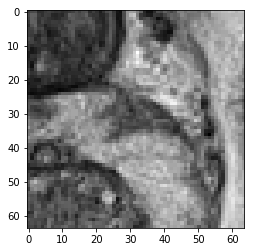

In [182]:
extract = sitk.ExtractImageFilter()
extract.SetSize([64,64,0])
extract.SetIndex([203-20, 168-32, 9])
extracted = extract.Execute(im)

extr_arr = sitk.GetArrayFromImage(extracted)
plt.imshow(extr_arr,cmap='gray')

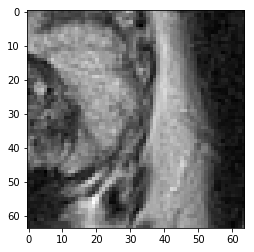

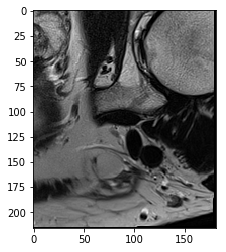

In [144]:
im = sitk.ReadImage('C://Image Processing/ProstateX/t2/t2_tse_tra_ProstateX_0002.nii')
cropped_im = im[203:384,168:384,9]

plt.imshow(sitk.GetArrayFromImage(cropped_im),cmap='gray')

In [140]:
im.GetSize()

(384, 384, 19)

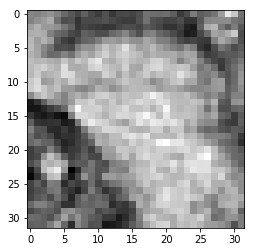

In [124]:
im = sitk.ReadImage('C://Image Processing/ProstateX/t2/t2_tse_tra_ProstateX_0002.nii')
im_arr = sitk.GetArrayFromImage(im)
im_sl_9 = im_arr[9,:,:]
im_sl_9 = sitk.GetImageFromArray(im_sl_9)

extract = sitk.ExtractImageFilter()
extract.SetSize([32,32])
extract.SetIndex([203, 168])
extracted_image = extract.Execute(im_sl_9)


extrcated_arr = sitk.GetArrayFromImage(extracted_image)

plt.imshow(extrcated_arr, cmap = 'gray')

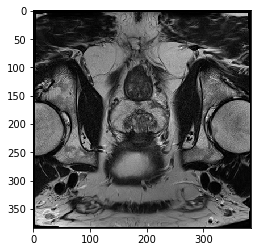

In [119]:
myshow(im_arr,9)

In [117]:
pos = [-2.058, 38.6752, -34.6104]
ijk = im.TransformPhysicalPointToIndex(pos)

print(ijk)

(203, 168, 9)


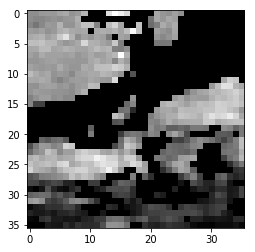

In [114]:
im = sitk.ReadImage('C://Image Processing/ProstateX/resampled/ep2d_diff_tra_DYNDIST_ADC_ProstateX_0000.nii')
im_arr = sitk.GetArrayFromImage(im)

im_sl_8 = im_arr[9,:,:]
im_sl_8 = sitk.GetImageFromArray(im_sl_8)

extract = sitk.ExtractImageFilter()
extract.SetSize([36,36])
extract.SetIndex([36, 72 ])
extracted_image = extract.Execute(im_sl_8)


extrcated_arr = sitk.GetArrayFromImage(extracted_image)

plt.imshow(extrcated_arr, cmap = 'gray')

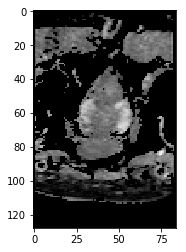

In [115]:
myshow(im_arr,9)

In [98]:
data_all.loc[data_all['ProxID']=='ProstateX-0000']

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8
5,ProstateX-0000,t2_tse_cor0,1,25.7457 31.8707 -38.511,"0.6,0,0,-57.5639,0,-0.190383,2.84497,29.839,0,...",139 166 12,1.0,3.0,"0.6,0.6,3",320x320x15x1,t2_tse_cor,5
6,ProstateX-0000,t2_tse_sag0,1,25.7457 31.8707 -38.511,"0,0,-3.6,73.1629,0.5625,0,0,-67.018,0,-0.5625,...",176 169 13,1.0,3.6,"0.5625,0.5625,3.6",320x320x19x1,t2_tse_sag,3
7,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,"0.5,1.00168e-010,0.00377059,-57.9373,-0.000199...",167 224 9,1.0,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,4
8,ProstateX-0000,tfl_3d_PD_ref_tra_1_5x1_5_t30,1,25.7457 31.8707 -38.511,"1.5,3.00503e-010,0.00377059,-58.4317,-0.000597...",56 75 7,1.0,3.0,"1.5,1.5,3",128x128x16x1,tfl_3d PD ref_tra_1.5x1.5_t3,9
